# Amazon Grocery Sales Prediction

# Project Plan

## The Data

The Amazon UK Grocery Dataset is a comprehensive and detailed collection of data containing various grocery products available on Amazon's UK platform. The dataset can be accessed on Kaggle by following this link: [Amazon UK Grocery Dataset](https://www.kaggle.com/datasets/dalmacyali1905/amazon-uk-grocery-dataset-unsupervised-learning?select=dataset.csv). The dataset was extracted using Helium10, a tool for Amazon sellers and researchers. It contains products created from 2006 to 2021. This ensures a high degree of accuracy and relevance, reflecting the current market statuses and trends for products sold on Amazon UK. By analysing the data, valuable insights can be provided into various aspects of the UK’s online grocery market, including consumer purchasing patterns, market dynamics, and competitive landscape. 

The dataset consists of 6341 rows with the following 18 features describing each product:


| Features | Data type | Description |
| --- | --- | --- |
| Product Details | object | A description of the grocery product |
| ASIN | object | Amazon Standard Identification Number |
| Brand | object | Brand of the product |
| Price | float64 | Price of the product |
| Sales | float64 | Number of units sold |
| BSR | float64 | Best Seller Rank on Amazon |
| FBA Fees | float64 | Fulfillment By Amazon fees |
| Active Sellers # | float64 | Number of active sellers for the product |
| Ratings | float64 | Average customer rating |
| Review Count | float64 | Number of customer reviews |
| Images | float64 | Number of product images available |
| Review velocity | float64 | The number of reviews added in a specified time frame |
| Buy Box | object | The seller who currently has the "Buy Box" for the product |
| Category | object | The category of the product on Amazon |
| Size Tier | object | Size classification for the product |
| Delivery | object | Delivery method |
| Dimensions | object | Product dimensions (Length x Width x Height) |
| Weight | float64 | Weight of the product |
| Creation Date | object | The date when the product was added to Amazon |

Based on an initial analysis of the data, there are nine variables of object type and nine variables of float type, with the exception of `Sales`, which is expected to be predicted. Upon closer inspection, it appears that there are missing values which need to be imputed, and some variables require conversion into appropriate types to enable training as a model.

In [1]:
import pandas as pd
df = pd.read_csv('dataset_CW3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Details   6341 non-null   object 
 1   ASIN              6341 non-null   object 
 2   Brand             6324 non-null   object 
 3   Price             5077 non-null   float64
 4   Sales             5113 non-null   float64
 5   BSR               5888 non-null   float64
 6   FBA Fees          3705 non-null   float64
 7   Active Sellers #  6290 non-null   float64
 8   Ratings           5513 non-null   float64
 9   Review Count      5513 non-null   float64
 10  Images            5849 non-null   float64
 11  Review velocity   6291 non-null   float64
 12  Buy Box           4409 non-null   object 
 13  Category          6341 non-null   object 
 14  Size Tier         4812 non-null   object 
 15  Delivery          5252 non-null   object 
 16  Dimensions        4825 non-null   object 


## Project Aim and Objectives

The aim of this project is to develop a regression model that accurately predicts the sales performance of grocery products on Amazon UK. In order to achieve this, the data can be analysed through Exploratory Data Analysis techniques, including visualisations, to identify the data’s inherent characteristics and patterns. By analysing the relationships between different variables, particularly those presumed to impact sales, one can gain a better understanding of the data and determine appropriate methods and techniques to improve the model. After gaining a comprehensive understanding of the data, it can be preprocessed to be trained. Then, different regression algorithms can be applied with various modelling techniques to ensure the accuracy and reliability of the model.

The project aims not only to enhance the accuracy of the sales prediction model but also to provide strategic guidance to suppliers and marketers. With the rise of online grocery shopping, the market has become highly competitive. By analysing correlation and feature importance, factors that significantly impact sales can be identified, allowing suppliers and marketers to differentiate themselves from competitors in the market. The insights provided by the model would allow them to focus on aspects that would prove to be more profitable and take strategic decisions.


### Specific Objective(s)

* __Objective 1:__ _Exploratory Data Analysis (EDA)_
* __Objective 2:__ _Data Preprocessing_
* __Objective 3:__ _Modelling_
* __Objective 4:__ _Insight_

## System Design

### Architecture

The data extracted from Amazon UK, goes through several stages to be trained as a regression model. First, the data is analysed through Exploratory Data Analysis and visualisations for each numerical and categorical variable, including relationships between variables to understand the data in various aspects. Appropriate methods and techniques are then applied for data preprocessing, such as imputing missing values, converting data types, encoding, and so on. To select the most useful variables for training the model, SelectKBest is applied. Once the data is prepared to be trained, the regression model is trained with several algorithms and the best model is selected, evaluating through hyperparameter tuning. Finally, this model can be used to provide insights into sales performance.

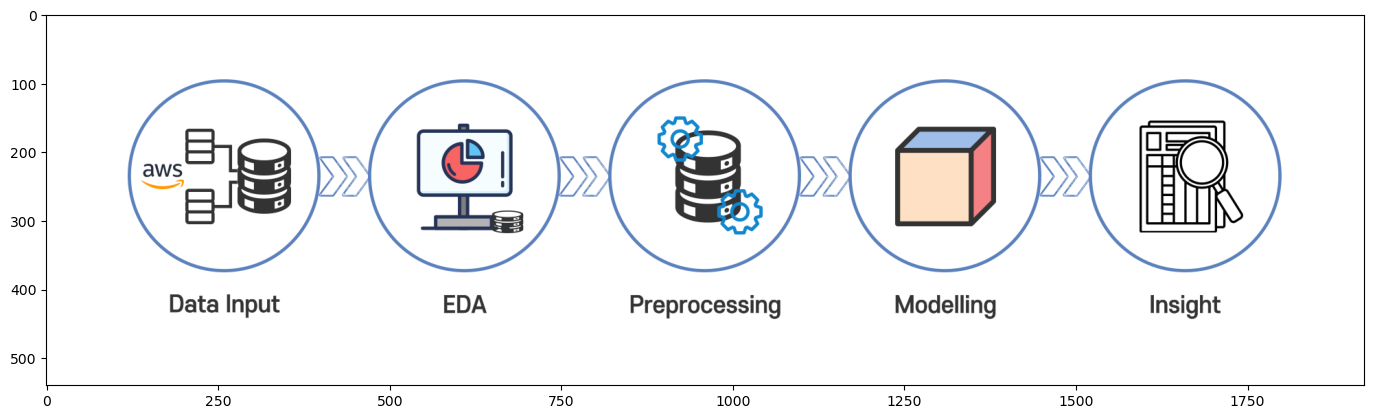

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread('architecture.png')
plt.figure(figsize=(17, 5))
plt.imshow(image)
plt.show()

### Processing Modules and Algorithms

* Exploratory Data Analysis and visualisations for each numerical and categorical variable, including relationships between variables
* Preprocessing the data: removing duplicates, imputing missing values, converting data types, encoding, adding an additional variable, removing outliers, and scaling
* Selecting variables by applying SelectKBest
* Selecting and training a suitable model by evaluating with different algorithms: RandomForestRegressor, XGBRegressor, and GradientBoostingRegressor
* Optimising the model by hyperparameters tunning

# Program Code


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay

import warnings 
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

__Distribution of numerical variables__

The following code plots histograms visualising the distributions of key numerical variables: `Price`, `BSR`, `FBA Fees`, `Active Sellers #`, `Review Count`, and `Review velocity`. These variables are chosen based on their statistical information, in order to provide insights into their underlying patterns and shapes of distribution.

In [4]:
def eda_numerical_var():
    # numerical variables
    numerical_var = ['Price', 'BSR', 'FBA Fees', 'Active Sellers #', 'Review Count', 'Review velocity']
    
    # plot distributions for the numerical variables
    fig, axes = plt.subplots(nrows=len(numerical_var), figsize=(20, 30))
    for i, col in enumerate(numerical_var):
        sns.histplot(df[col], ax=axes[i], bins=50, kde=True, color='g')
        axes[i].set_title(f'Distribution of {col}', fontsize=15)
        axes[i].set_xlabel(col, fontsize=15)
        axes[i].set_ylabel('Frequency', fontsize=15)
    
    plt.tight_layout()
    plt.show()

__Distribution of categorical variables__

The following code plots bar graphs exploring the distributions of key categorical variables: `Brand`, `Ratings`, `Buy Box`, `Category`, `Size Tier`, and `Delivery`. The top 10 most frequent categories are represented for each variable, facilitating an understanding of the prevalence of other categories.

In [5]:
def eda_categorical_var():
    # categorical variables
    categorical_variables = ['Brand', 'Ratings', 'Buy Box', 'Category', 'Size Tier', 'Delivery']
    
    # plot distributions for the categorical variables
    fig, axes = plt.subplots(nrows=len(categorical_variables), figsize=(20, 30))
    for i, col in enumerate(categorical_variables):
        value_counts = df[col].value_counts().sort_values(ascending=False).head(10)
        axes[i].bar(value_counts.index, value_counts.values, color='g')
        axes[i].set_title(f'Most Frequent in {col}', fontsize=15)
        axes[i].set_xlabel(col, fontsize=15)
        axes[i].set_ylabel('Count', fontsize=15)

    plt.tight_layout()
    plt.show()

__Correlations of numerical variables__

The following code visualises the correlation matrix of numerical variables: `Price`, `BSR`, `FBA Fees`, `Active Sellers #`, `Ratings`, `Review Count`, `Images`, `Review velocity`, `Weight`, and `Sales`. An informative overview of the relationships among key numerical variables is shown through the heatmap.

In [6]:
def eda_correlation():
    numerical_variables = ['Price', 'BSR', 'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images', 
                           'Review velocity', 'Weight', 'Sales']
    
    # plot the correlation matrix for the numerical variables
    corr = df[numerical_variables].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200))
    plt.title("Correlation Matrix of Numerical Variables", fontsize=15)
    
    plt.show()

__Relationships with Sales__

The following code visualises key relationships between variables and `Sales` by plotting scatter plots for numerical variables, `Price`, `BSR`, `Active Sellers #`, `Ratings`, `Review Count`, and `Review velocity`, and a boxplot for a categorical variable, `Category`. Furthermore, appropriate x limits for scatter plots are provided to visualise relationships without outliers.

In [7]:
def eda_key_relationships():
    # scatter plots to see relationships with 'Sales'
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
    axes[0][0].scatter(df['Price'], df['Sales'], color='g')
    axes[0][0].set_xlabel('Price')
    axes[0][1].scatter(df['BSR'], df['Sales'], color='g')
    axes[0][1].set_xlim(-30000, 1000000)
    axes[0][1].set_xlabel('BSR')
    axes[1][0].scatter(df['Active Sellers #'], df['Sales'], color='g')
    axes[1][0].set_xlabel('Active Sellers #')
    axes[1][1].scatter(df['Ratings'], df['Sales'], color='g')
    axes[1][1].set_xlabel('Ratings')
    axes[2][0].scatter(df['Review Count'], df['Sales'], color='g')
    axes[2][0].set_xlim(-1000, 30000)
    axes[2][0].set_xlabel('Review Count')
    axes[2][1].scatter(df['Review velocity'], df['Sales'], color='g')
    axes[2][1].set_xlim(-500, 1500)
    axes[2][1].set_xlabel('Review velocity')
    plt.show()
    
    # box plots to see relationships with 'Sales'
    sns.boxplot(data=df, x='Category', y='Sales')

## Data Preprocessing

__Duplicates__

The following code removes duplicates within `ASIN`. Duplicates are removed, leaving only one row with the option `keep='first'`.

In [8]:
df['ASIN'].value_counts().head(10)

B08LD4HG35    6
B07HNFRSRJ    6
B096V7WYPD    5
B096VCYLN5    5
B08124W9FX    5
B07Y8M3G2C    5
B07W14FQCD    5
B096V7678N    5
B06XWR1Z63    5
B01CJXS1V0    5
Name: ASIN, dtype: int64

In [9]:
def df_duplicates():
    global df
    # remove duplicates within 'ASIN', keeping the first row
    df = df.drop_duplicates(['ASIN'], keep='first')
    # reset index
    df.reset_index(drop = True, inplace = True)

__Missing values__

Understanding the data, different methods need to be applied for each variable to impute missing values.

In [10]:
df.isnull().sum()

Product Details        0
ASIN                   0
Brand                 17
Price               1264
Sales               1228
BSR                  453
FBA Fees            2636
Active Sellers #      51
Ratings              828
Review Count         828
Images               492
Review velocity       50
Buy Box             1932
Category               0
Size Tier           1529
Delivery            1089
Dimensions          1516
Weight              1437
Creation Date          1
dtype: int64

__Sales__
Since `Sales` is the variable to be predicted, remove all the rows with the missing values in `Sales`.

__Brand__
Impute the missing values with respect to `Product Details` if the brand name is included. Remove the ones without brand information in `Product Details`.

__Price__
Visualising with boxplots of `Price` with respect to `Category`, it seems to have significant characteristics in terms of the categories. Therefore, impute the missing values with the `Price` modes for the corresponding categories. 
However, there are a few categories with only one data. Remove ones from those categories with only one data as the mode cannot be determined.

__FBA Fees__
Since there are 1127 missing values in `FBA Fees`, remove the column.

__Active Sellers #__
The number of rows where both `Sales` and `Active Sellers #` are missing is the same as those where `Active Sellers #` is missing, and there is no `0` value in `Active Sellers #`. Assuming there are no sales since there are no active sellers, impute the missing values in `Active Sellers #` with 0.

__Ratings & Review Count__
The numbers of missing values for `Ratings` and `Review Count` are the same, and if `Rating` is missing, `Review Count` is also missing. Additionally, there is no `0` value in both `Ratings` and `Review Count`. Assuming that there are no ratings since there are no reviews, impute the missing values for both with 0.

__Images__
Since there is no `0` value in `Images`, assuming that there are no images for the missing values, impute the missing values with 0.

__Review velocity & Weight__
Impute the missing values with the medians.

__Delivery & Size Tier__
Impute the missing values with the modes.

__Buy Box__
If `Delivery` is `AMZ`, then `Buy Box` is `Amazon` except for one row with `Amazon EU`. First, impute the missing values with `Amazon` where `Delivery` is `AMZ`. For the rest where `Delivery` is either `MFN` or `FBA`, impute the missing values with the modes for each of `MFN` and `FBA`. 

__Dimensions__
`Dimensions` is a string variable with length, width and height in the form of `Lenth x Width x Height`. First, to impute the missing values with a better method, convert the string variable to a numerical variable by calculating dimensions multiplying all three numbers, length, width and height. Then, impute the missing values with the median of `Dimensions`.

__Creation Date__
The missing value has been removed in the process of working with the missing values.

__BSR & Category__
There are no missing values.

In [11]:
def df_missing_values():
    global df
    # Sales
    df.dropna(subset = ['Sales'], inplace = True)
    
    # Brand
    df.loc[df['ASIN']=='B01EX18HWE', 'Brand'] = 'Evian'
    df.loc[df['ASIN']=='B002N3NRLQ', 'Brand'] = 'La Croix'
    df.loc[df['ASIN']=='B079NJ8CW2', 'Brand'] = 'OATLY'
    df.dropna(subset=['Brand'], inplace = True)
    
    # Price
    median_prices = df.groupby('Category')['Price'].transform('median')
    df['Price'].fillna(median_prices, inplace = True)
    df.dropna(subset=['Price'], inplace=True)
    
    # FBA Fees
    df.drop(['FBA Fees'], axis=1, inplace=True)
    
    # Active Sellers #
    df['Active Sellers #'] = df['Active Sellers #'].fillna(0)
    
    # Ratings & Review Count
    df['Ratings'] = df['Ratings'].fillna(0)
    df['Review Count'] = df['Review Count'].fillna(0)
    
    # Images
    df['Images'] = df['Images'].fillna(0)
    
    # Review velocity
    df['Review velocity'] = df['Review velocity'].fillna(df['Review velocity'].median())
    
    # Delivery
    delivery_m = df['Delivery'].mode()[0]
    df['Delivery'] = df['Delivery'].fillna(delivery_m)
    
    # Buy Box
    df.loc[(df['Delivery']=='AMZ')&(df['Buy Box'].isnull()), 'Buy Box'] = 'Amazon'
    df.loc[(df['Delivery']=='MFN')&(df['Buy Box'].isnull()), 'Buy Box'] = 'FoodServiceDirect'
    df.loc[(df['Delivery']=='FBA')&(df['Buy Box'].isnull()), 'Buy Box'] = 'Valley of Tea'
    
    # Dimensions
    df[['D1', 'D2', 'D3']] = df['Dimensions'].str.split('x', expand=True)
    df = df.astype({'D1':'float', 'D2':'float', 'D3':'float'})
    df['Dimensions'] = df['D1']*df['D2']*df['D3']
    df.drop(['D1','D2','D3'], axis=1, inplace=True)
    df['Dimensions'] = df['Dimensions'].fillna(df['Dimensions'].median())
    
    # Size Tier
    size_m = df['Size Tier'].mode()[0]
    df['Size Tier'] = df['Size Tier'].fillna(size_m)
    
    # Weight
    df['Weight'] = df['Weight'].fillna(df['Weight'].median())
    
    # reset index
    df.reset_index(drop = True, inplace = True)

__Visualisation for missing values__

The following code visualises the number of missing values for each variable by plotting a distribution, including a horizontal line for the threshold at `0.4`.

In [12]:
def vis_missing_values():
    # distribution of missing values for each variable
    sns.displot(data=df.isnull().melt(value_name='missing'), y='variable', hue='missing', multiple='fill', height=5, aspect=1)
    plt.axvline(0.4, color='r')
    plt.title('Visualisation for missing values', fontsize=10)
    plt.show()

__Data types__

The following code converts data types of variables into appropriate ones. Variables where the data type is `float` due to the missing values, which are meant to be `int`, need to be converted to `int`. Moreover, the data type of `Creation Date` needs to be converted to `datetime` type.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Details   6341 non-null   object 
 1   ASIN              6341 non-null   object 
 2   Brand             6324 non-null   object 
 3   Price             5077 non-null   float64
 4   Sales             5113 non-null   float64
 5   BSR               5888 non-null   float64
 6   FBA Fees          3705 non-null   float64
 7   Active Sellers #  6290 non-null   float64
 8   Ratings           5513 non-null   float64
 9   Review Count      5513 non-null   float64
 10  Images            5849 non-null   float64
 11  Review velocity   6291 non-null   float64
 12  Buy Box           4409 non-null   object 
 13  Category          6341 non-null   object 
 14  Size Tier         4812 non-null   object 
 15  Delivery          5252 non-null   object 
 16  Dimensions        4825 non-null   object 


In [14]:
def df_dtypes():
    global df
    # 'Creation Date' into 'datetime'
    df['Creation Date'] = pd.to_datetime(df['Creation Date'])
    
    # into 'int'
    df = df.astype({'Sales':'int', 'BSR':'int', 'Active Sellers #':'int', 'Ratings':'int', 'Review Count':'int', 
                    'Images':'int', 'Review velocity':'int'})

__Variables__

The following code converts variables into appropriate forms. 

First, since `Product Details` and `ASIN` are not used to train a model, remove the columns. Also, convert `Creation Date` into three different variables, `Creation Date_year`, `Creation Date_month`, and `Creation Date_day` to train the model.

As an additional variable, create a variable called `Period` by calculating how long a product has been selling in days from `2021-12-31`.

For categorical variables, encoding needs to be done. Label encoding is applied for variables with over 20 categories such as `Brand`, `Buy Box`, and `Category`. For others, `Size Tier` and `Delivery`, one-hot encoding is used.

In [15]:
def df_variables():
    global df
    # remove 'Product Details' & 'ASIN'
    df.drop(['Product Details', 'ASIN'], axis=1, inplace=True)
    
    # 'Period'
    df['Period'] = (pd.to_datetime('2021-12-31') - df['Creation Date']).dt.days
    df = df.astype({'Period':'int'})
    
    # into year, month and day
    df['Creation Date_year'] = df['Creation Date'].dt.year
    df['Creation Date_month'] = df['Creation Date'].dt.month
    df['Creation Date_day'] = df['Creation Date'].dt.day
    df.drop(['Creation Date'], axis=1, inplace=True)
    
    # label encoding
    encoder = LabelEncoder()
    df['Brand'] = encoder.fit_transform(df['Brand'])
    df['Buy Box'] = encoder.fit_transform(df['Buy Box'])
    df['Category'] = encoder.fit_transform(df['Category'])
    
    # one-hot encoding
    df = pd.get_dummies(df, columns = ['Size Tier'])
    df = pd.get_dummies(df, columns = ['Delivery'])

__Outliers__

The following code removes outliers in numerical variables. Visualising with boxplots, outliers could be found from the numerical variables. Therefore, remove the outliers by using the interquartile range for each variable.

In [16]:
def df_outliers():
    global df
    # remove outliers for numerical variables
    col_names = ['Price', 'Active Sellers #', 'Review Count', 'Images', 'Review velocity', 'Dimensions', 'Weight', 'Period']
    for col in col_names:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        condition = df[col] > Q3+1.5*IQR
        idx_drop = df[condition].index
        df.drop(idx_drop, inplace=True)
    
    # reset index
    df.reset_index(drop = True, inplace = True)

__Visualisation for outliers__

The following code visualises outliers by plotting boxplots for each numerical variable: `Price`, `BSR`, `Active Sellers #`, `Review Count`, `Images`, `Review velocity`, `Dimensions`, and `Weight`.

In [17]:
def vis_outliers():
    # plot boxplots to visualise outliers for numerical variables
    fig, ax = plt.subplots(figsize=(10,6))
    plt.boxplot(df[['Price', 'Active Sellers #', 'Review Count', 'Images', 'Review velocity', 'Dimensions', 'Weight']])
    ax.set_title("Visualisation for outliers", fontsize=10)
    ax.set_xticklabels(['Price', 'Active Sellers #', 'Review Count', 'Images', 'Review velocity', 'Dimensions', 'Weight'], 
                       fontsize=9)
    
    plt.show()

__Scaling__

The following code scales numerical variables with different ranges by `Normalizer()`.

In [18]:
def df_scaler():
    global df
    # scaling with Normalizer
    features = ['Price', 'BSR', 'Active Sellers #', 'Review Count', 'Images', 'Review velocity', 'Dimensions', 'Weight', 
                'Period']
    scaler = Normalizer()
    scaler.fit(df[features])
    df[features] = scaler.transform(df[features])

## Modelling

__Train Test Split__

The following code splits the dataset into train and test datasets.

In [19]:
def train_test():
    X = df.loc[:, df.columns!='Sales']
    y = df[['Sales']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=34)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return (X_train, X_test, y_train, y_test)

__Feature selection__

The following code gives scores of variables based on statistical tests. The scores are visualised by a bar plot, allowing to compare each other. This provides an idea for selecting variables for the best model.

In [20]:
def select_features():
    global X_train, y_train, X_test
    # SelectKBest
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    # scores
    for i in range(len(fs.scores_)):
        print(X_train.columns[i], ':', fs.scores_[i])
    # plot the scores
    scores_df = pd.DataFrame({'Feature': X_train.columns, 
                              'Importance': fs.scores_}).sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=scores_df)
    plt.title('Feature Selection', fontsize=10)
    plt.show()

__Evaluation of a model__

The following code trains a model given as an input and returns its mean absolute error, mean squared error, root mean squared error, and r-squared values.

In [21]:
def evaluate_model(model):
    global X_train, y_train, X_test, y_test
    # predictions of the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # mae, mse, rmse, r2 of the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2, y_pred

__Training with various regression models__

The following code trains with various regression models to provide an insight into a suitable model with the data given. This returns MAE, MSE, RMSE, and R^2 values of the models trained with LinearRegression, LogisticRegression, RandomForestRegressor, XGBRegressor, GradientBoostingRegressor, and DecisionTreeRegressor. 

In [22]:
def select_models():
    # list of models
    models = []
    models.append(('LinearRegression', LinearRegression()))
    models.append(('LogisticRegression', LogisticRegression()))
    models.append(('RandomForestRegressor', RandomForestRegressor()))
    models.append(('XGBRegressor', XGBRegressor()))
    models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
    models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
    
    # save model results
    mae_lst = []
    mse_lst = []
    rmse_lst = []
    r2_lst = []
    names_lst = []
    y_pred_lst = []
    
    for name, model in models:
        mae, mse, rmse, r2, y_pred = evaluate_model(model)
        mae_lst.append(mae)
        mse_lst.append(mse)
        rmse_lst.append(rmse)
        r2_lst.append(r2)
        names_lst.append(name)
        y_pred_lst.append(y_pred)
    
    results_df = pd.DataFrame({"mae": mae_lst, "mse": mse_lst, "rmse": rmse_lst, "r2": r2_lst}, index=names_lst)
    print(results_df)
    
    return models, y_pred_lst

__Visualisation for each model__

The following code visualises the performances of different models trained earlier.

In [23]:
def vis_select_models():
    global y_test
    models, y_pred_lst = select_models()
    
    # plot a scatter plot of the predicted and actual values for each model
    fig, axes = plt.subplots(nrows=len(models), figsize=(20, 30))
    for i, (name, model) in enumerate(models):
        axes[i].scatter(y_test, y_pred_lst[i], alpha=0.5, color="green")
        axes[i].plot(range(1000), range(1000), color="red")
        axes[i].set_title(f'{name} True vs Pred')
        axes[i].set_xlabel('y_true')
        axes[i].set_ylabel('y_pred')

__Tuning hyperparameters__

The following code tunes the hyperparameters of a Random Forest Regression model with parameters given as input. The model has been selected by the result of `select_models()`. Training the model with the best parameters found by grid search, this returns MAE, MSE, RMSE, and R^2 values of the model with the best parameters.

In [24]:
def hyperparams_tuning():
    global X_train, y_train, X_test, y_test
    # parameters
    params_grid = {
        'n_estimators': [50, 100, 150], 
        'max_features': ['auto', 'sqrt', 'log2', 1.0], 
        'max_depth': [3, 6, 9, None], 
        'max_leaf_nodes': [3, 6, 9, None],
        'min_samples_split': [2, 5]
    }
    
    # grid search
    rfg = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(estimator=rfg, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)
    
    # best parameters
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best parameters found: ", best_params)
    
    # training with the best parameters
    best_rfg = RandomForestRegressor(**best_params, random_state=0)
    mae, mse, rmse, r2, y_pred = evaluate_model(best_rfg)
    print("mae:", mae, "\nmse:", mse, "\nrmse:", rmse, "\nr2:", r2)
    
    return mae, mse, rmse, r2, y_pred, best_rfg

__Visualisations for the model performance__

The following code visualises the performance of the model trained with the best parameters found previously. This represents the model's performance by plotting a scatter plot of the predicted and actual values and a residual plot.

In [25]:
def vis_model_performance():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
    # plot a scatter plot of the predicted and actual values
    axes[0].scatter(y_test, y_pred, color="green")
    axes[0].plot(range(1000), range(1000), color="red")
    axes[0].set_title('True vs Pred', fontsize=10)
    axes[0].set_xlabel('y_true')
    axes[0].set_ylabel('y_pred')
    
    # residual plot
    y_resid = y_test['Sales'].to_numpy()-y_pred
    axes[1].scatter(y_test, y_resid, color="green")
    axes[1].axhline(y=0, color="red")
    axes[1].set_title('Residual plot', fontsize=10)
    axes[1].set_xlabel('y_true')
    axes[1].set_ylabel('residual')

## Insight

__Feature importance__

The following code visualises the feature importance of each variable. This highlights the percentage of importance of each variable in order of highest importance.

In [26]:
def feature_importance(best_rfg):
    # feature importance
    rfc = best_rfg
    rfc.fit(X_train, y_train)
    feature_importance = rfc.feature_importances_
    
    # feature importance dataframe in order of highest
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 
                                          'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
    
    # visulisation of feature importances
    plt.figure(figsize=(12,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

__Correlations of numerical variables__

The following code visualises the correlation matrix of numerical variables selected previously: `Price`, `BSR`, `Active Sellers #`, `Ratings`, `Review Count`, `Images`, `Review velocity`, `Dimensions`, `Weight`, `Period`, and `Sales`. An informative overview of the relationships among the numerical variables is shown through the heatmap.

In [27]:
def eda_correlation2():
    numerical_variables = ['Price', 'BSR', 'Active Sellers #', 'Ratings', 'Review Count', 'Images', 'Review velocity', 
                           'Dimensions', 'Weight', 'Period', 'Sales']
    
    # plot the correlation matrix
    corr = df[numerical_variables].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200))
    plt.title("Correlation Matrix of Numerical Variables", fontsize=15)
    
    plt.show()

__Visualisation of partial dependence for 'Images'__

The following code visualises the partial dependence plot to show the dependence between `Sales` and `Images`.

In [28]:
def partial_dep_Images():
    global X_train, y_train
    # the optimised model
    RandomForestRegressor({'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50}, random_state=0)
    best_rfg.fit(X_train, y_train)

    # partial dependence plot of 'Images'
    PartialDependenceDisplay.from_estimator(best_rfg, X_train, ['Images'])
    plt.axvline(x = 0.0004, color = 'r')
    plt.show()

__Analysis of partial dependence__

The following code searches for the original value of `Images` by creating a dataset containing original and scaled values. This allows for the analysis of partial dependence. 

In [29]:
def undo_normalizer():
    df_comparison = pd.DataFrame()
    
    # save the normalised and original values into one dataframe to compare
    features = ['Price', 'BSR', 'Active Sellers #', 'Review Count', 'Images', 'Review velocity', 'Dimensions', 'Weight', 
                'Period']
    df_normalised = df[features]
    
    for feature in features:
        df_comparison[feature + "_original"] = df_original[feature]
        df_comparison[feature + "_normalised"] = df_normalised[feature]
    
    # save a dataframe only for 'Images'
    df_images = df_comparison[['Images_original','Images_normalised']].sort_values(by='Images_normalised',ascending=True)
    df_images = df_images[(df_images['Images_normalised']>=0.00039) & (df_images['Images_normalised']<=0.00041)]
    
    return df_images

# Project Outcome

## Overview of Results

By analysing the data and applying appropriate preprocessing methods, the model is successfully trained. Some key patterns are found by visualising the distributions of numerical and categorical variables, the correlation matrix of numerical variables, and scatter plots and boxplots for relationships with `Sales`. Based on the observations, appropriate methods are applied for data preprocessing for training a model. In particular, different methods are applied to impute the missing values for better modelling. The model is then trained using various regression algorithms, examining with few indicators to select the one with the best accuracy. The best accuracy is achieved by `RandomForestRegressor`. To further enhance the model, a grid search with different hyperparameters is applied to optimise it. As a result, a regression model with an MAE of `27.4781` and an R^2 of `72.8%` is obtained. 

Upon analysing the model, an important insight is obtained. According to correlations and feature importance scores, the variable `Images` has the most significant impact on the model. This suggests that increasing the number of images can lead to an increase in sales. As part of further analysis, a partial dependence plot is used to examine the variable in more detail and provide a more comprehensive analysis.


## Objective 1

### Explanation of Results

By visualising the distributions for key numerical variables, the patterns of each variable are shown. The majority of variables, such as `Price`, `BSR`, `Active Sellers #`, and `Review Count`, display positive skewness in their distributions, as shown. On the other hand, the distributions of `FBA Fees` and `Review velocity` are relatively symmetric. The distributions seem to have empty spaces to due outliers which need to be removed. Additionally, the distribution of `Review velocity` shows that it contains negative values which is incorrect as it represents the number of reviews added in a specified time frame.

From distributions of key categorical variables, the top 10 most frequently occurring categories are visualized. Based on the plots, it can be seen that `Morrison` is the most frequent brand in the data, and `Drinks` is the most frequent category. Additionally, the distributions of `Buy Box` and `Size Tier` indicate that the most frequent categories of each variable have significantly higher frequency compared to others.

The correlation matrix of numerical variables visualizes the relationships between different variables. The heatmap reveals that `FBA Fees` and `Weight` exhibit the highest correlation of `0.82`. Furthermore, `FBA Fees` and `Price` have the second highest correlation of `0.65`. This suggests that as the weight and price of a product increase, its `FBA Fees` also increase. When examining the correlation between `Sales` and other variables, we note that `Review Count` has the strongest correlation with `Sales` at `0.7`. `Active Sellers #` has the second highest correlation with `Sales` at `0.43`. This indicates that `Review Count` and `Active Sellers #` may significantly impact sales performance.

Finally, scatter plots and boxplots have been used to visualise the key relationships with `Sales`. The plots reveal a significant relationship between `Sales` and `Ratings`, indicating that higher ratings lead to higher sales. Additionally, the plots represent that there are relatively strong correlations of `Active Sellers #`, `Review Count` and `Reveiw velocity` with `Sales`. Also, the boxplots between `Category` and `Sales` show different distributions for each category. 


### Visualisation


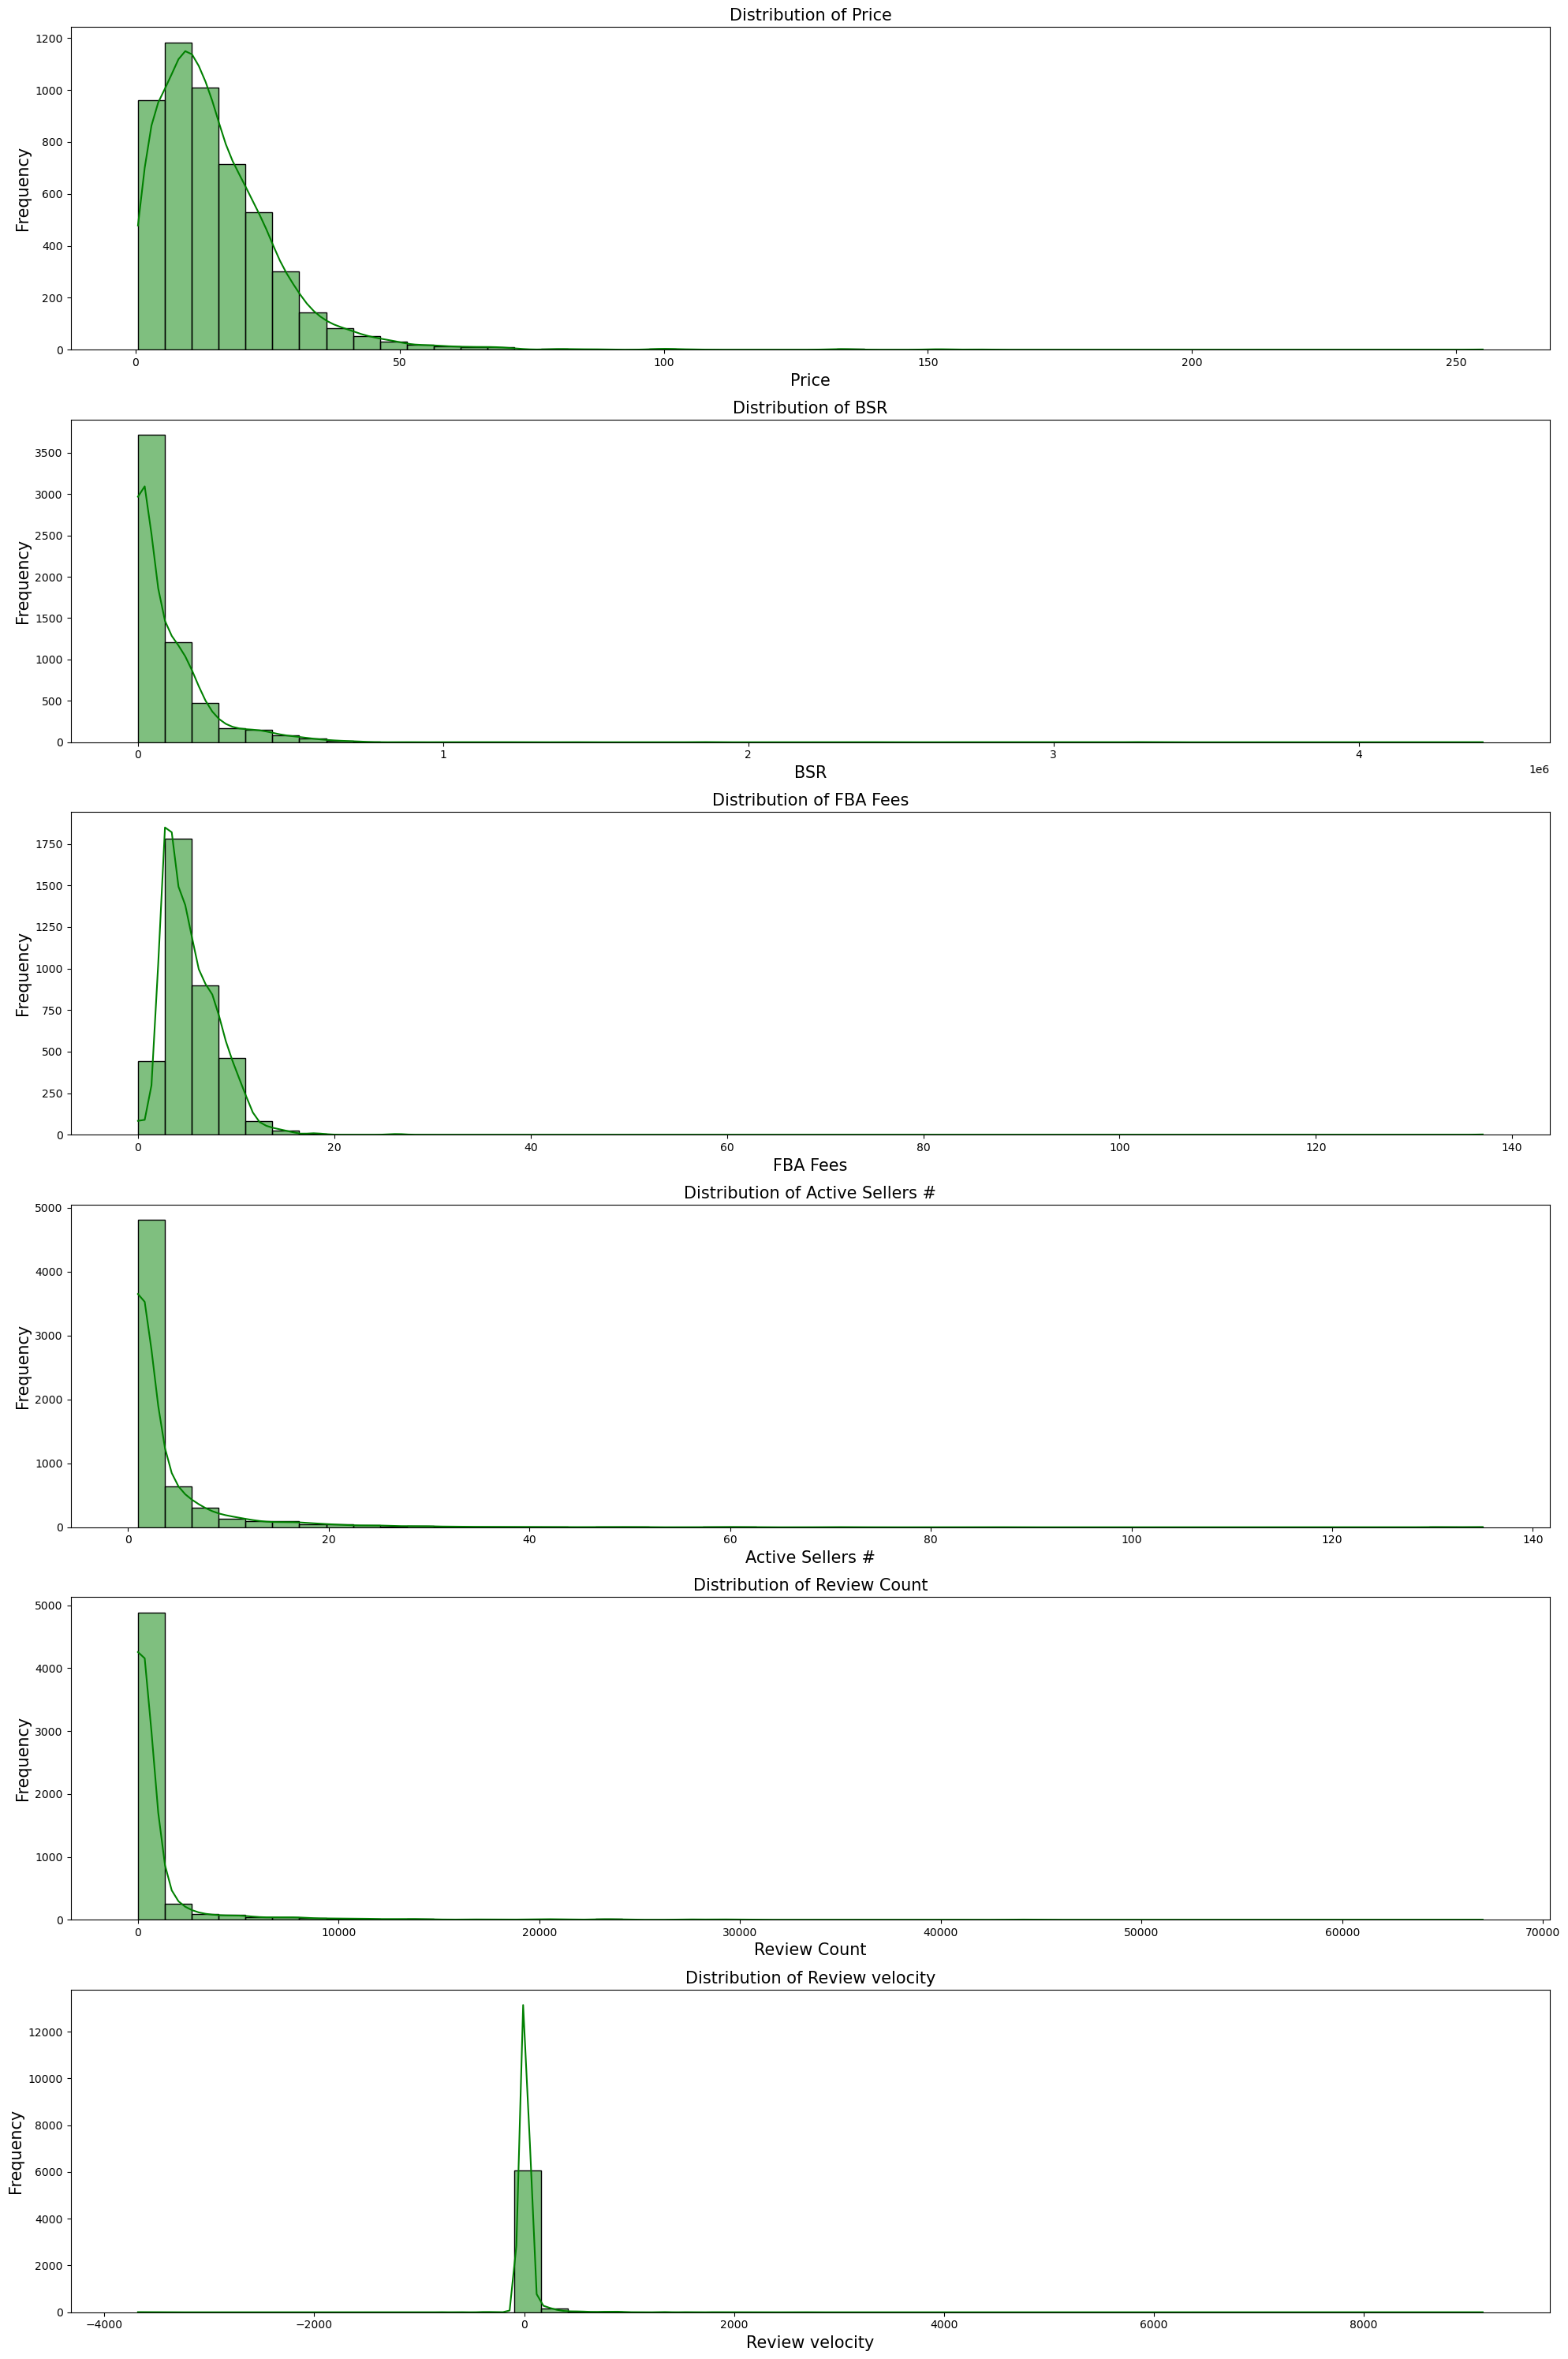

In [30]:
# distributions for numerical variables
eda_numerical_var()

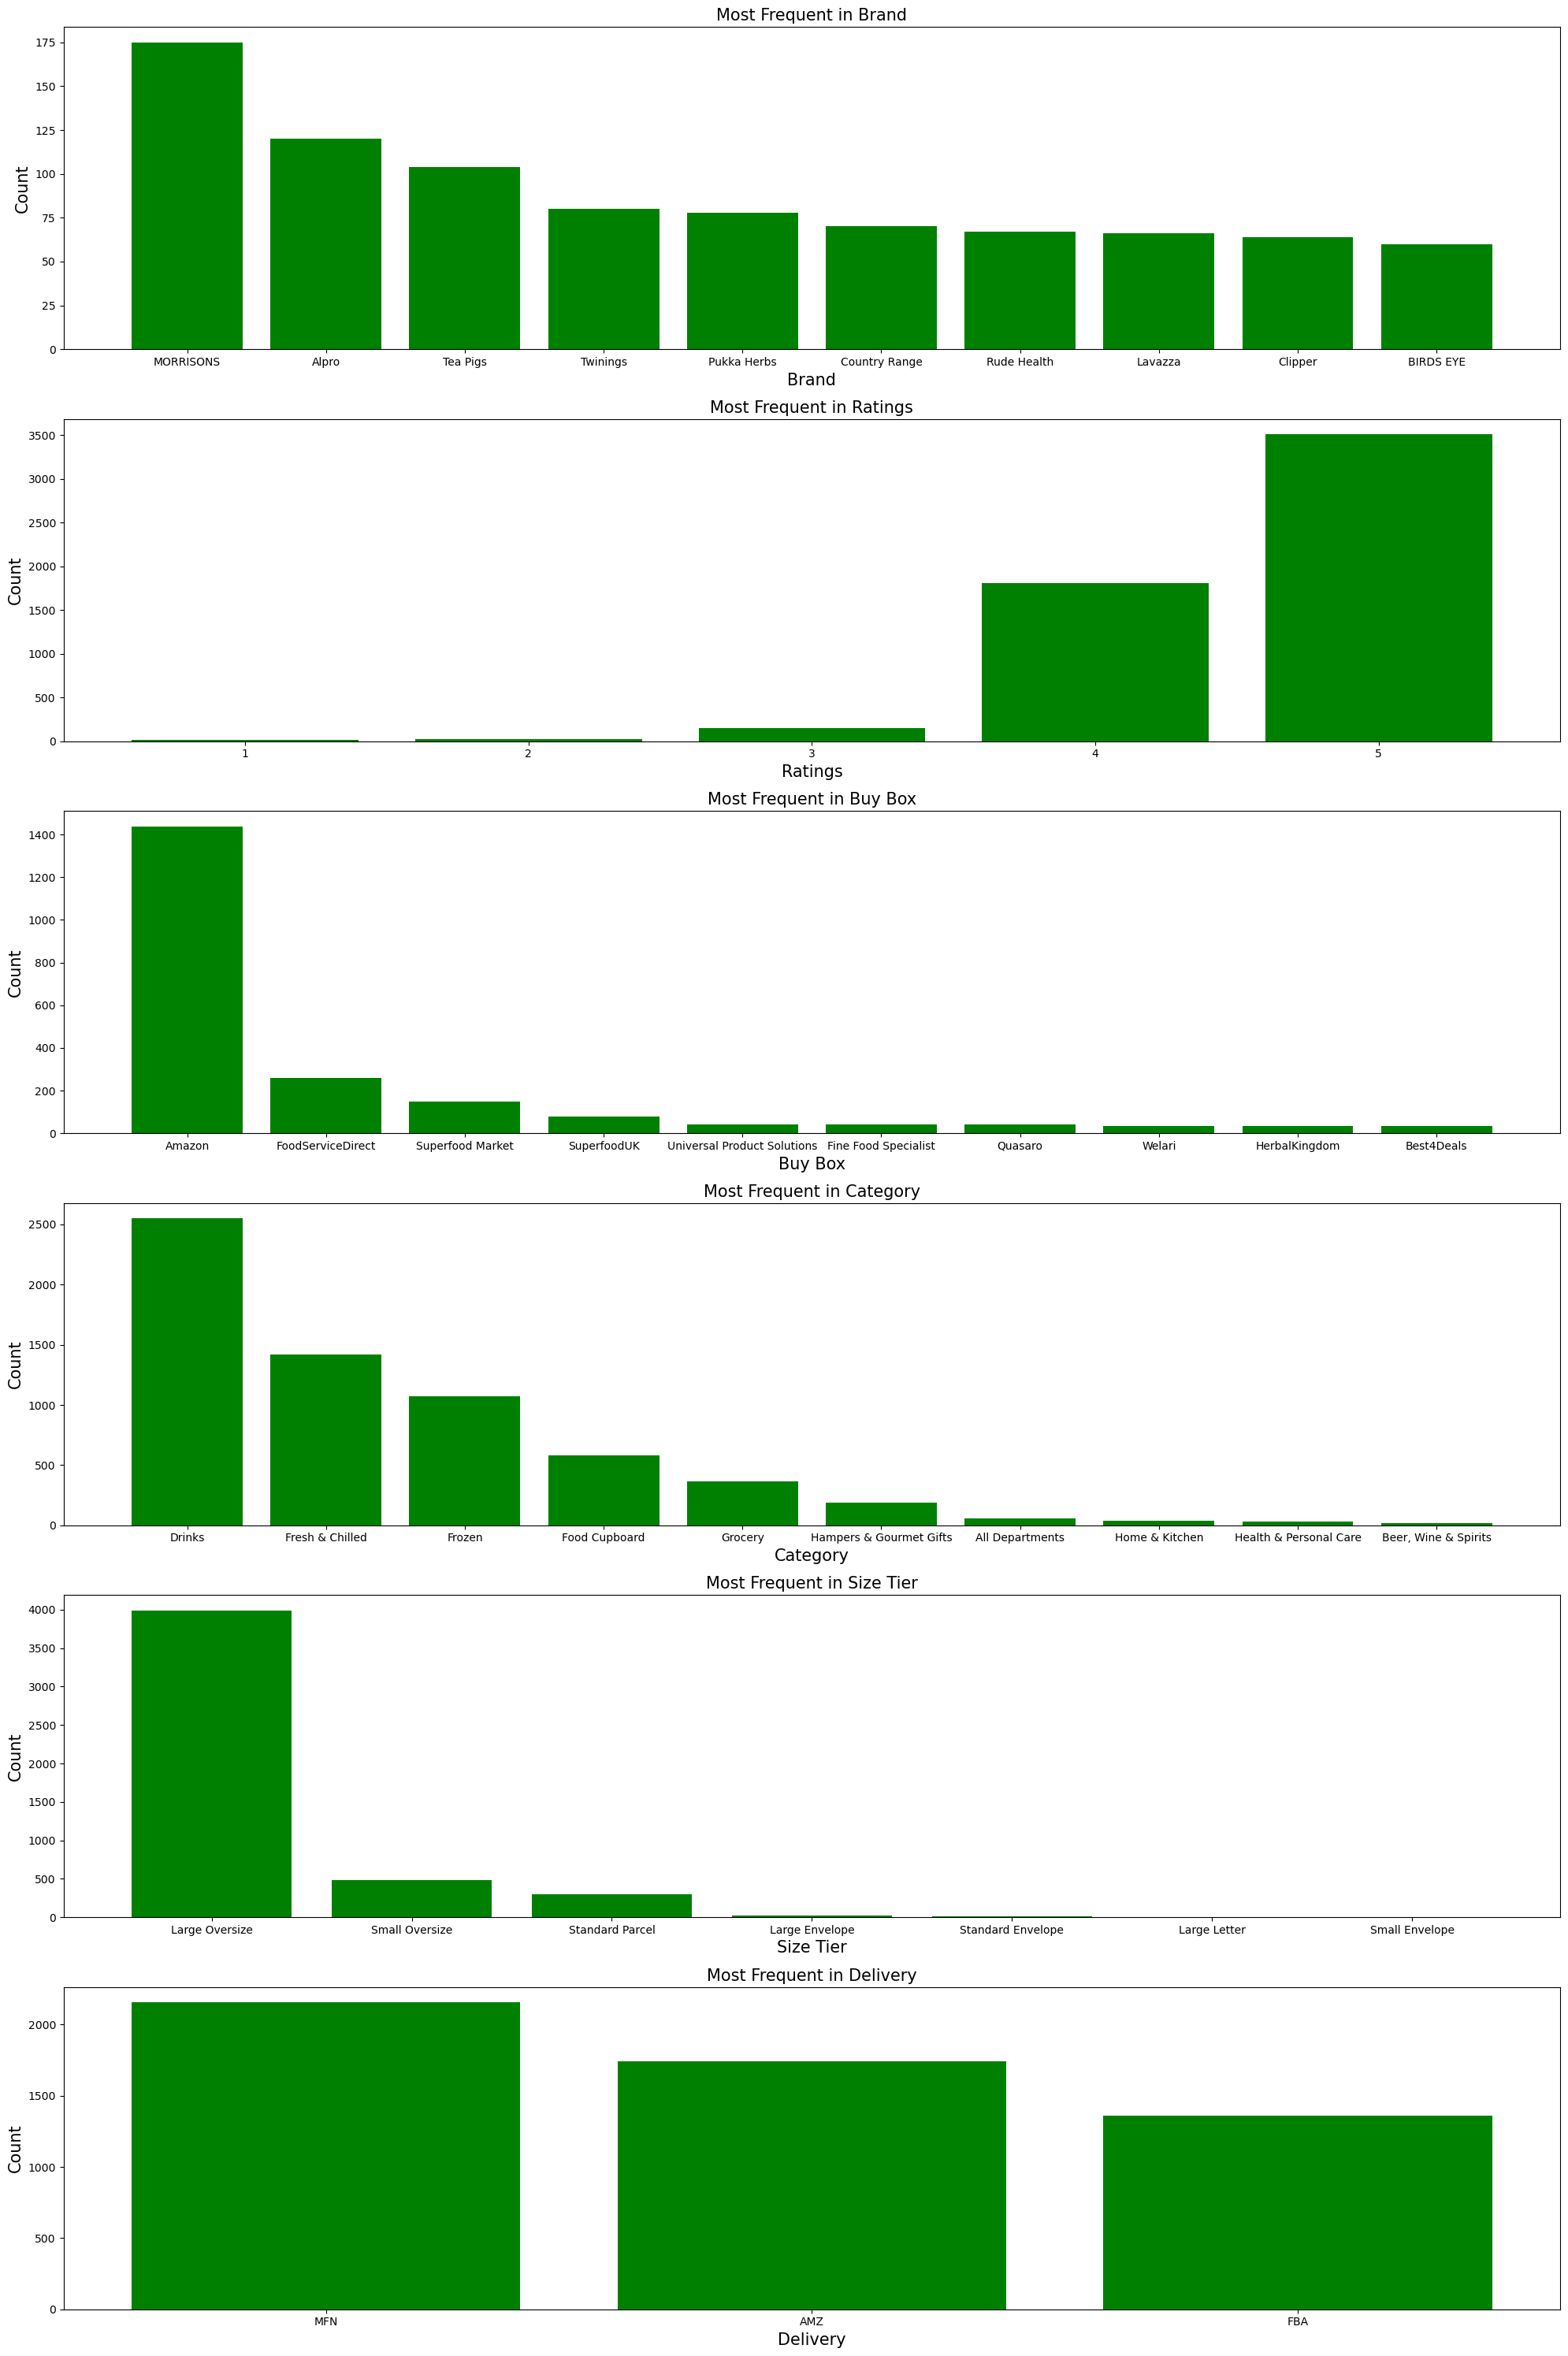

In [31]:
# ditributions of categorical variables
eda_categorical_var()

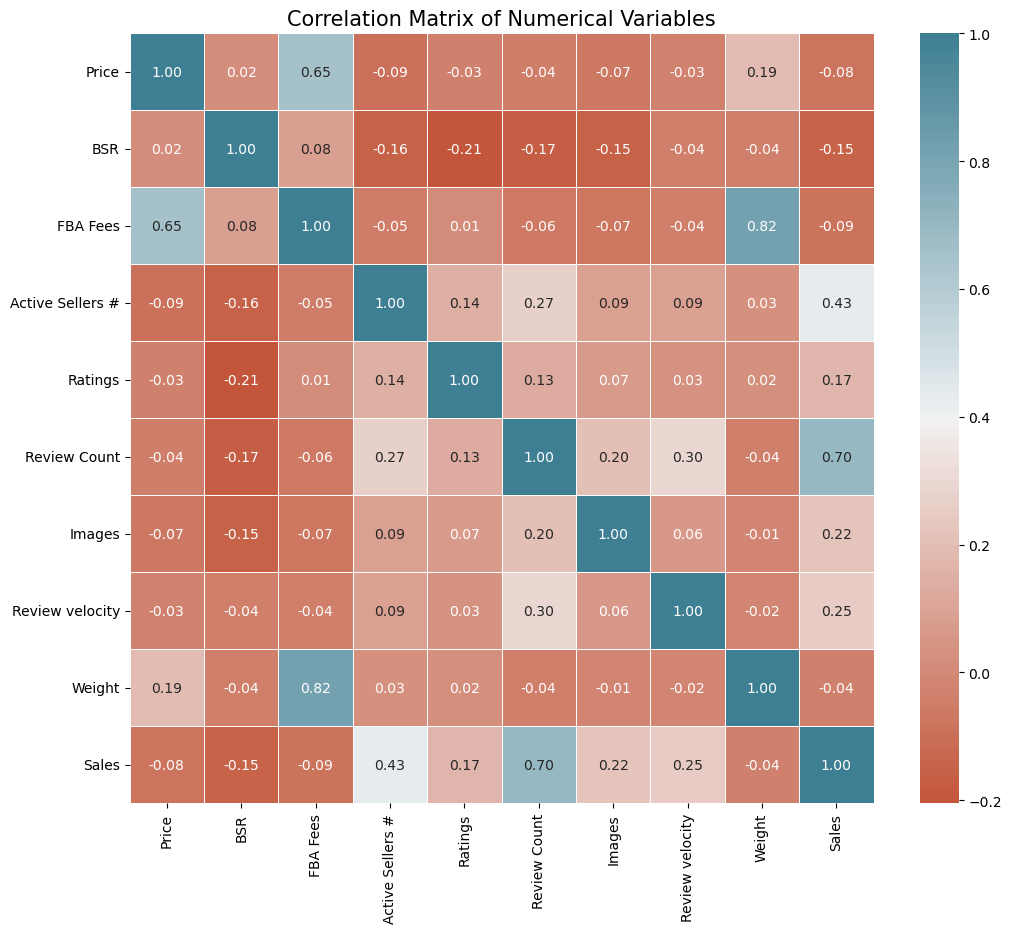

In [32]:
# correlation matrix of numerical variables
eda_correlation()

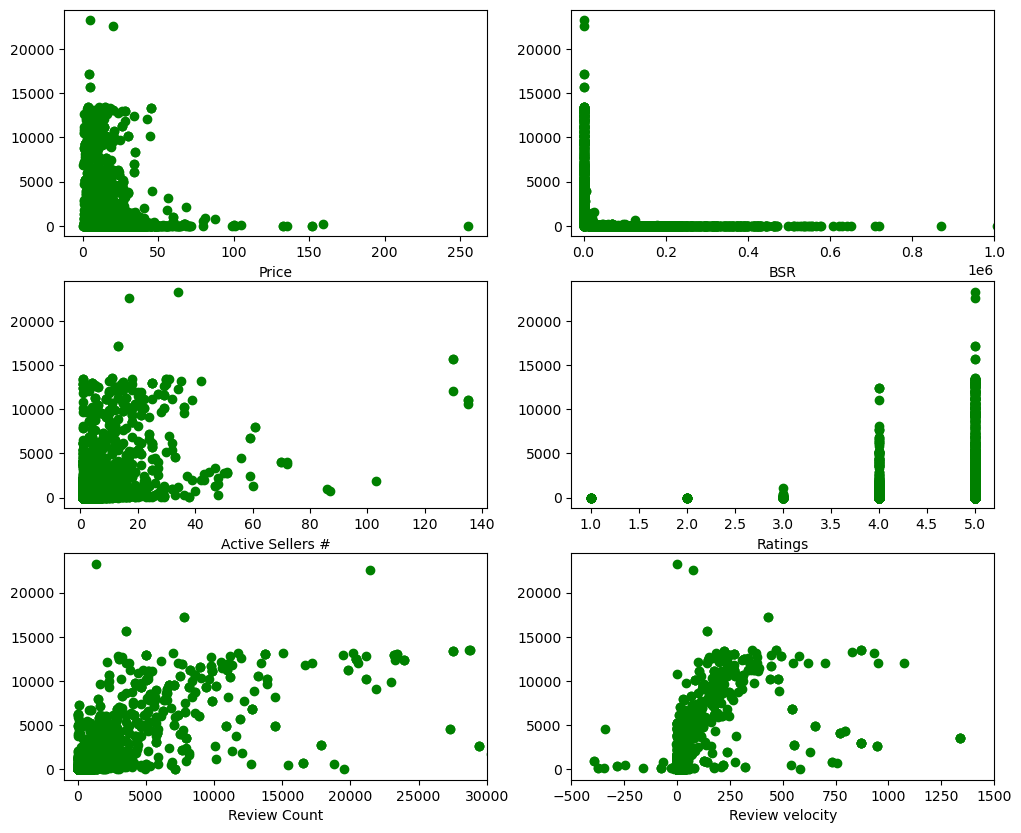

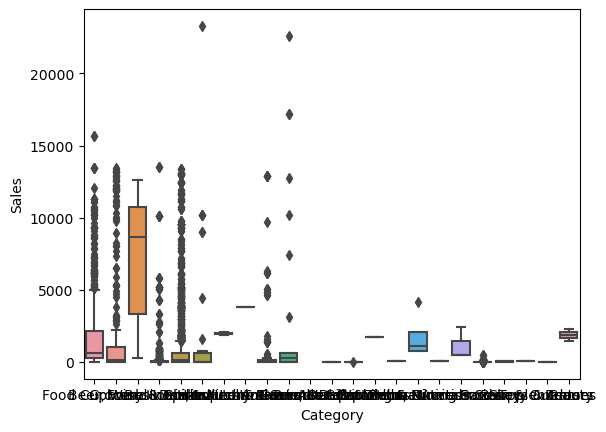

In [33]:
# key relationships with 'Sales'
eda_key_relationships()

## Objective 2
### Explanation of Results

In order to train a model, the data must undergo several preprocessing stages. Firstly, since each product is identified by its `ASIN` key, any duplicates are removed, leaving only one row. 

There are numerous missing values in the dataset. Understanding the data, different methods are applied for each variable. For instance, `FBA Fees` has the most missing values, which exceeds the threshold at `0.4`. Therefore, `FBA Fees` is removed rather than imputing missing values. Another example is the missing values of `Buy Box`, which are imputed with respect to `Delivery`. This is done by analysing the relationship between `Buy Box` and `Delivery`, since `Buy Box` is `Amazon` where `Delivery` is `AMZ`.

In the next step, the variables are assigned appropriate data types. If any variable is meant to be of `int` data type but has `float` data type due to missing values, the data type is converted to `int`. Moreover, the data type of `Creation Date` is converted to `datetime` data type. `Creation Date` is also transformed into a suitable form, breaking down into year, month, and day. An additional variable is created by calculating the number of days a product has been selling since `2021-12-31`. 

For categorical variables, label encoding or one-hot encoding is used depending on the number of categories they contain. Variables with more than 20 categories, such as `Brand`, `Buy Box`, and `Category`, undergo label encoding. On the other hand, variables such as `Size Tier` and `Delivery` undergo one-hot encoding.

Visualising boxplots of numerical variables, it is evident that there are numerous outliers present. In order to address this issue, the outliers are removed using the interquartile range for each variable. After the removal of outliers, the boxplots reveal better distributions as shown. Additionally, as numerical variables have different ranges that could impact model training, the variables are scaled using `Normalizer()` to improve the model’s performance.


### Visualisation

In [34]:
df['ASIN'].value_counts().head(10)

B08LD4HG35    6
B07HNFRSRJ    6
B096V7WYPD    5
B096VCYLN5    5
B08124W9FX    5
B07Y8M3G2C    5
B07W14FQCD    5
B096V7678N    5
B06XWR1Z63    5
B01CJXS1V0    5
Name: ASIN, dtype: int64

In [35]:
# removing duplicates
df_duplicates()
df['ASIN'].value_counts()

B00NW479QO    1
B00HZUIX0W    1
B07XD3G76V    1
B07CL7FMCW    1
B0040Y5PV6    1
             ..
B08231X462    1
B0062Y5TNG    1
B07DLXZ1GM    1
B0013G3A7A    1
B08G874BS3    1
Name: ASIN, Length: 5071, dtype: int64

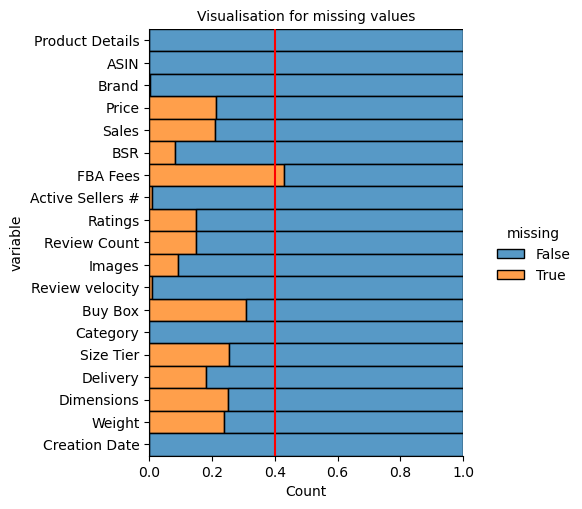

In [36]:
# distribution of missing values
vis_missing_values()

<Axes: xlabel='Category', ylabel='Price'>

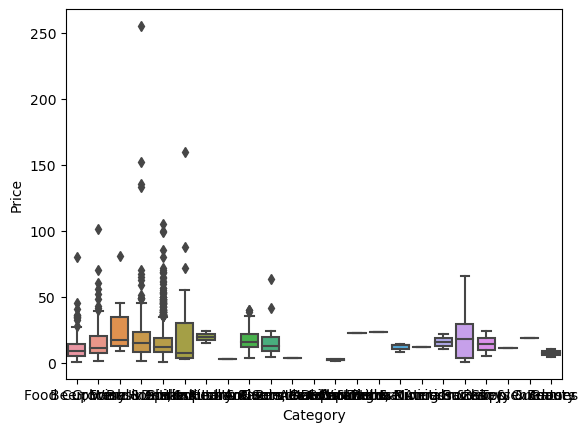

In [37]:
# boxplots of 'Price' respect to 'Category' which shows significant characteristics for different categories
sns.boxplot(data=df, x='Category', y='Price')

In [38]:
# imputing missing values
df_missing_values()
df.isnull().sum()

Product Details     0
ASIN                0
Brand               0
Price               0
Sales               0
BSR                 0
Active Sellers #    0
Ratings             0
Review Count        0
Images              0
Review velocity     0
Buy Box             0
Category            0
Size Tier           0
Delivery            0
Dimensions          0
Weight              0
Creation Date       0
dtype: int64

In [39]:
# converting data types
df_dtypes()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Details   4007 non-null   object        
 1   ASIN              4007 non-null   object        
 2   Brand             4007 non-null   object        
 3   Price             4007 non-null   float64       
 4   Sales             4007 non-null   int32         
 5   BSR               4007 non-null   int32         
 6   Active Sellers #  4007 non-null   int32         
 7   Ratings           4007 non-null   int32         
 8   Review Count      4007 non-null   int32         
 9   Images            4007 non-null   int32         
 10  Review velocity   4007 non-null   int32         
 11  Buy Box           4007 non-null   object        
 12  Category          4007 non-null   object        
 13  Size Tier         4007 non-null   object        
 14  Delivery          4007 n

In [41]:
# converting variables to appropriate forms
df_variables()

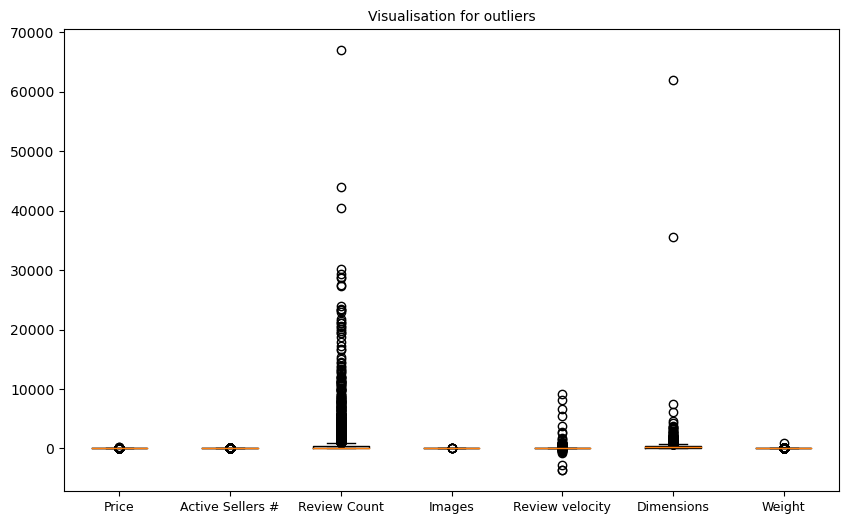

In [42]:
# boxplots to visualise outliers, before removing outliers
vis_outliers()

In [43]:
# removing outliers
df_outliers()

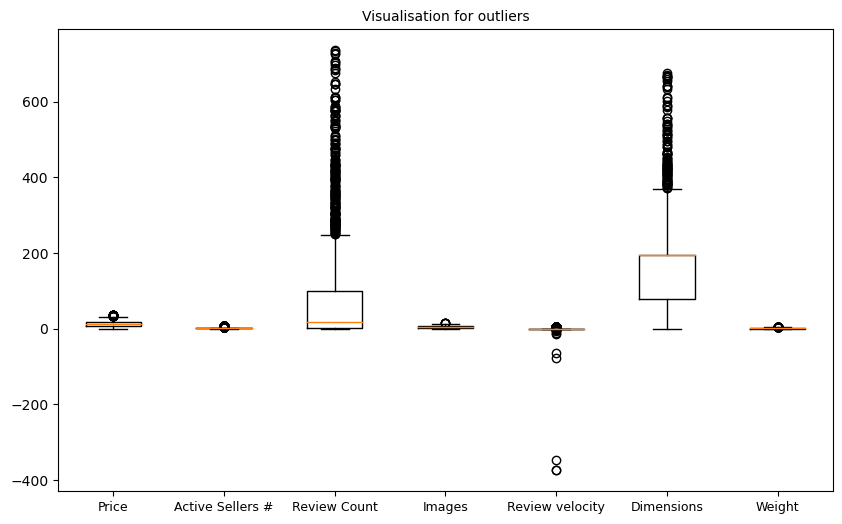

In [44]:
# boxplots to visualise outliers, after removing outliers
vis_outliers()

In [45]:
# saving a copy of dataframe before scaling for objective 4
df_original = df.copy()

In [46]:
# scaling
df_scaler()

In [47]:
# the final dataset to train a model
df

,Brand,Price,Sales,BSR,Active Sellers #,Ratings,Review Count,Images,Review velocity,Buy Box,...,Size Tier_Large Envelope,Size Tier_Large Letter,Size Tier_Large Oversize,Size Tier_Small Envelope,Size Tier_Small Oversize,Size Tier_Standard Envelope,Size Tier_Standard Parcel,Delivery_AMZ,Delivery_FBA,Delivery_MFN
0,789,0.047459,1277,0.161575,0.002739,5,0.065725,0.019170,0.000000,38,...,0,0,1,0,0,0,0,1,0,0
1,278,0.030942,10791,0.288794,0.003438,0,0.000000,0.027504,0.000000,38,...,0,0,1,0,0,0,0,1,0,0
2,918,0.041186,5111,0.737974,0.016491,5,0.284470,0.012368,0.000000,38,...,0,0,0,0,1,0,0,1,0,0
3,894,0.000330,99,0.999458,0.000066,4,0.007806,0.000265,0.000000,588,...,0,0,1,0,0,0,0,0,0,1
4,894,0.001626,122,0.997965,0.000125,4,0.027659,0.000626,0.000250,588,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,834,0.001422,347,0.993417,0.000290,5,0.019300,0.001016,0.000435,423,...,0,0,1,0,0,0,0,0,1,0
1977,364,0.001325,233,0.997819,0.000442,5,0.018724,0.000737,0.000000,589,...,0,0,1,0,0,0,0,0,1,0
1978,257,0.000806,227,0.928878,0.000577,5,0.020875,0.000346,0.000346,38,...,0,0,1,0,0,0,0,1,0,0
1979,28,0.002765,340,0.978196,0.000154,4,0.055181,0.001076,0.000307,22,...,0,0,1,0,0,0,0,0,1,0


## Objective 3
### Explanation of Results

Prior to training a model, it is important to select suitable variables. `SelectKBest` is a method used to accomplish this. The feature scores plot displays the scores of each variable, highlighting the ones with relatively high scores compared to others. Based on the feature scores, the following variables are selected for training the model: `Brand`, `Price`, `BSR`, `Active Sellers #`, `Ratings`, `Review Count`, `Images`, `Review velocity`, `Buy Box`, `Category`, `Dimensions`, `Weight`, `Period`, and `Delivery`.

With the selected variables, several regression models are trained using different algorithms such as `LinearRegression`, `LogisticRegression`, `RandomForestRegressor`, `XGBRegressor`, `GradientBoostingRegressor`, and `DecisionTreeRegressor`. Then, the performance of each model is compared by using MAE, MSE, RMSE, and R^2 values as indicators. It appears that the `RandomForestRegressor` algorithm performed the best with the given data. This can be confirmed by visualising scatter plots with predicted and actual values, which demonstrated that the `RandomForestRegressor` model has a narrower range near the diagonal.

Next, the model is optimised by tuning its hyperparameters. By using `GridSearchCV` to search for the best parameters, the following hyperparameters are found to work the best: `{'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 50}`. The optimised model has the lowest error rate, with an MAE of `27.4781` and an R^2 of `72.8%`.

After modelling, the performance is assessed by visualising scatter plots of predicted and actual values as well as residual and actual values. The scatter plot of predicted and actual values indicates that they are closely distributed along the diagonal, implying that the predicted values are in close proximity to the actual values. Similarly, the scatter plot of residual and actual values reveals that they are also closely distributed along the horizontal line at 0, indicating that the errors are minimal.


### Visualisation

In [48]:
# spliting into train and test datasets
X_train, X_test, y_train, y_test = train_test()

(1584, 26) (397, 26) (1584, 1) (397, 1)


Brand : 0.19441870069855227
Price : 0.6022005218284869
BSR : 0.42578124286686414
Active Sellers # : 0.763362566788401
Ratings : 0.06818831389509272
Review Count : 0.48919024662144217
Images : 0.657362712591036
Review velocity : 0.25089029487807935
Buy Box : 0.24305829878285046
Category : 0.15565908213874335
Dimensions : 0.49600327780459086
Weight : 0.42429009761022485
Period : 0.37149696197640925
Creation Date_year : 0.06146745493723582
Creation Date_month : 0.023853477402640877
Creation Date_day : 0.023816496543731525
Size Tier_Large Envelope : 0.0
Size Tier_Large Letter : 0.0028561259442976272
Size Tier_Large Oversize : 0.006862569697803078
Size Tier_Small Envelope : 0.0015384896181727115
Size Tier_Small Oversize : 0.0
Size Tier_Standard Envelope : 0.01294747355811987
Size Tier_Standard Parcel : 0.009012888813552333
Delivery_AMZ : 0.09383553220851981
Delivery_FBA : 0.08953393127737197
Delivery_MFN : 0.1809847767196633


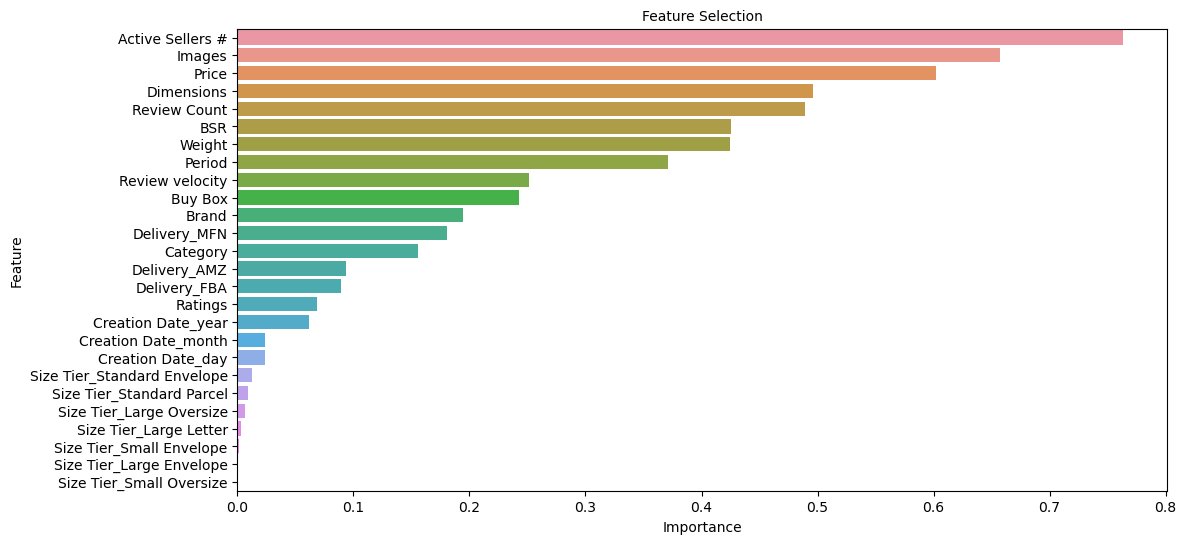

In [49]:
# feature scores with a visualisation of the scores
select_features()

In [50]:
# selecting variables based on the scores
df = df[['Brand', 'Price', 'Sales', 'BSR', 'Active Sellers #', 'Ratings', 'Review Count', 'Images', 'Review velocity', 
       'Buy Box', 'Category', 'Dimensions', 'Weight', 'Period', 'Delivery_MFN', 'Delivery_FBA', 'Delivery_AMZ']]

In [51]:
# spliting into train and test datasets
X_train, X_test, y_train, y_test = train_test()

(1584, 16) (397, 16) (1584, 1) (397, 1)


                                 mae           mse        rmse        r2
LinearRegression           47.845579  16629.044786  128.953654  0.126785
LogisticRegression         63.672544  23079.471033  151.919291 -0.211935
RandomForestRegressor      24.208438   4761.605262   69.004386  0.749961
XGBRegressor               26.220746   6266.423229   79.160743  0.670941
GradientBoostingRegressor  26.068929   5642.378553   75.115768  0.703711
DecisionTreeRegressor      34.934509  10509.433249  102.515527  0.448135


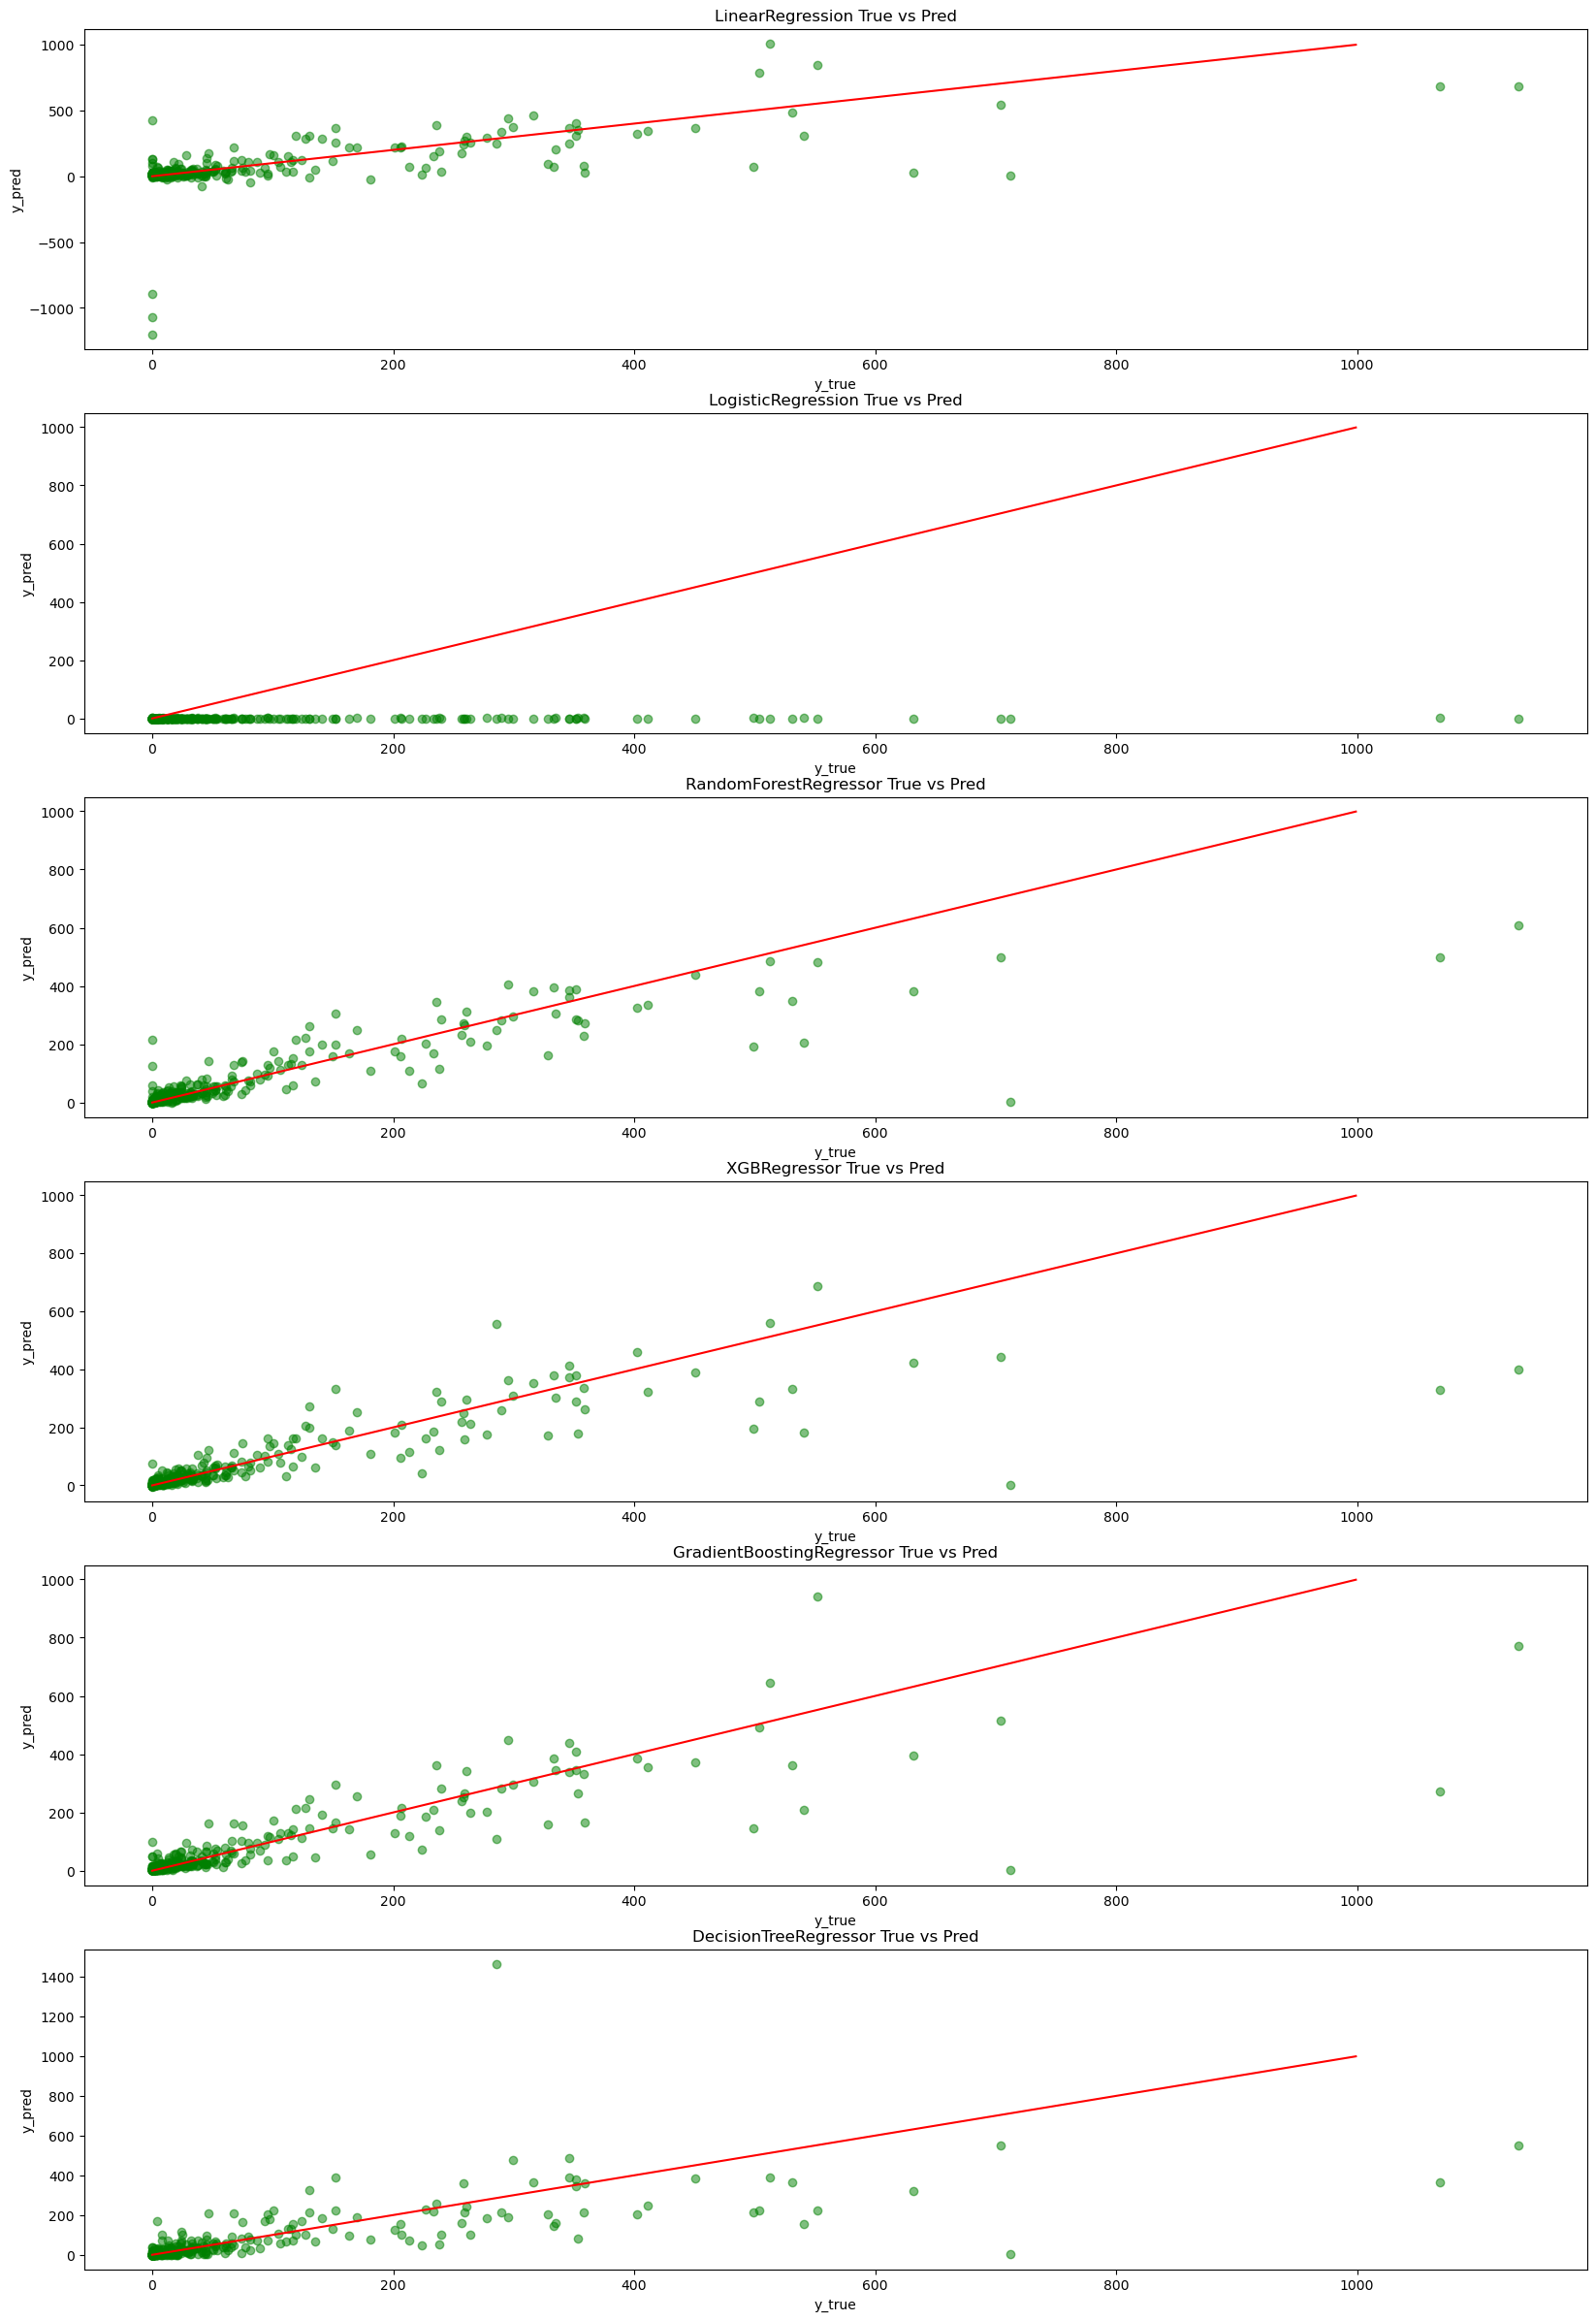

In [52]:
# training with different algorithms to select the best model and visualising the performance of each model
vis_select_models()

In [53]:
# tuning hyperparameters with the model selected previously, RandomForestRegressor
mae, mse, rmse, r2, y_pred, best_rfg = hyperparams_tuning()

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters found:  {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 50}
mae: 27.47806868570705 
mse: 5173.779798671179 
rmse: 71.92899136420014 
r2: 0.7283175542622367


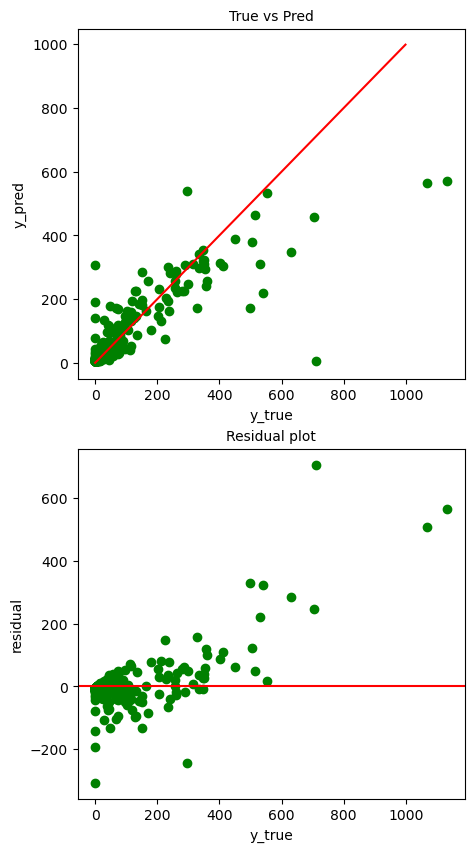

In [54]:
# visualising model performances
vis_model_performance()

## Objective 4 
### Explanation of Results

By analysing the correlations between variables and feature importance scores, the variables that have the most impact on sales can be identified.

By examining the correlation matrix of numerical variables, the variables that are highly correlated with `Sales` can be identified. This implies that if the value of a variable increases, the sales also increase. Therefore, the sales can be increased by increasing the value of that variable. According to the correlation matrix, it is evident that `Images` has the highest correlation with `Sales` with a value of `0.84`. This indicates that customers are more likely to make a purchase when more images of the product are available.

However, the correlation analysis only takes into account the numerical variable and does not consider categorical variables. Visualising the feature importance scores, it can be seen that `Images` has the highest score. This provides strong evidence that this insight can be trusted as the variable that has the most impact on sales.

To further examine the variable `Images`, a partial dependence plot can be used. This plot shows the dependence between `Sales` and `Images`, while taking into account the values of all other input variables. The partial dependence plot indicates that the graph increases rapidly with a steep slope from around `0.0004`, suggesting that having more than a certain number of images will positively impact sales. However, since the value 0.0004 is scaled, the original value is unknown. To solve this issue, by creating a new dataframe that only includes the original and scaled values for `Images` and setting a range from `0.00039` to `0.00041`, it is determined that the original value of 0.0004 is actually 5. Therefore, it can be concluded that having more than 5 images has a significant impact on sales, encouraging customers to make more purchases.


### Visualisation


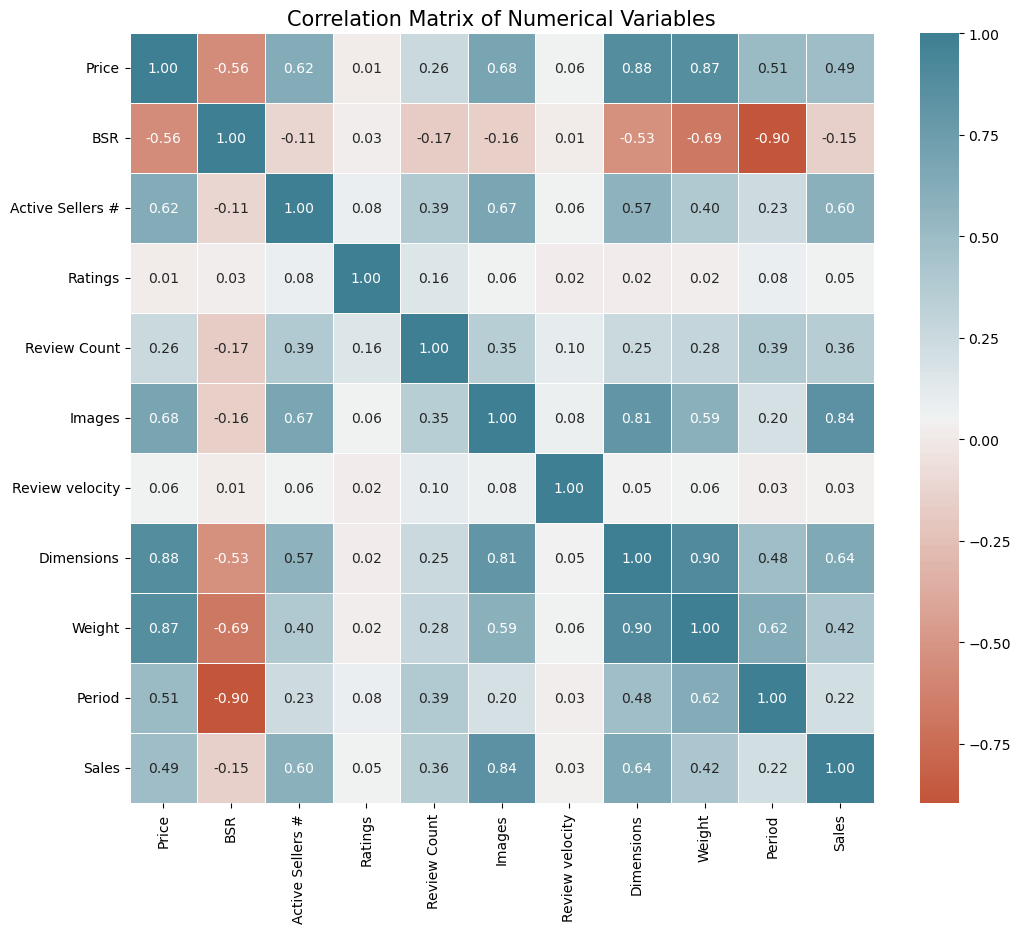

In [55]:
# correlation matrix of the selected numerical variables
eda_correlation2()

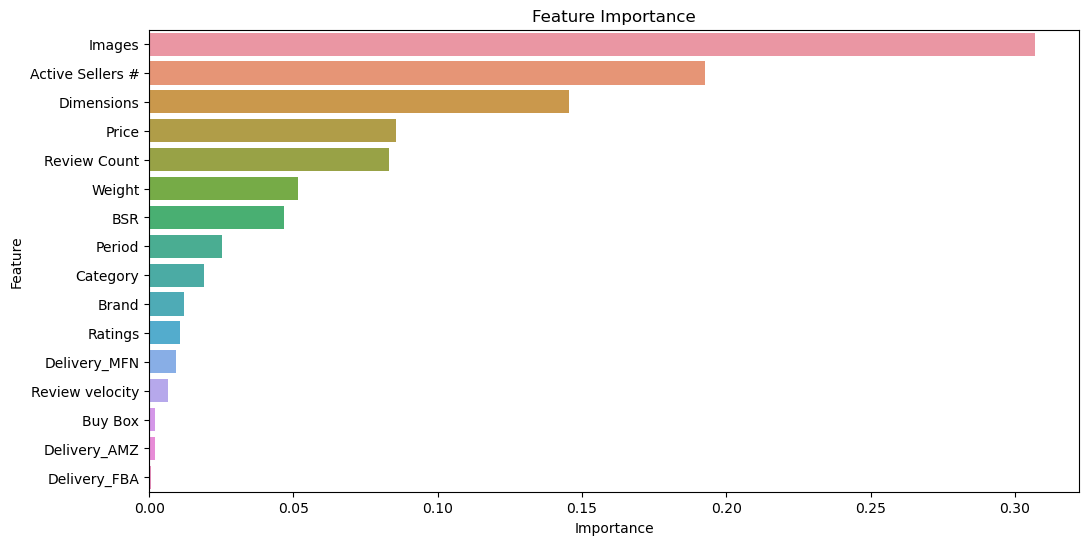

In [56]:
# visualsing feature importance scores
feature_importance(best_rfg)

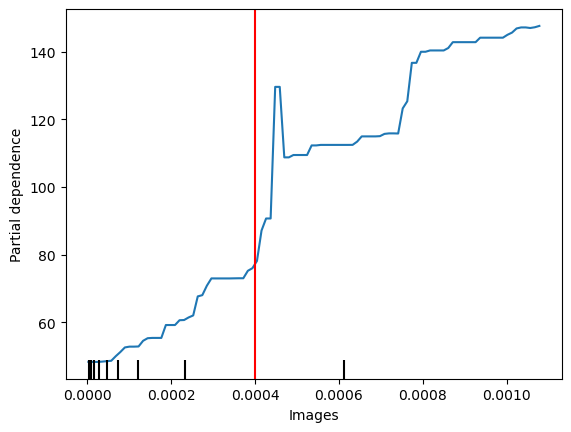

In [57]:
# visualising partial dependence of 'Images'
partial_dep_Images()

In [58]:
# looking for a value before scaling for analysis of the partial dependence plot
undo_normalizer()

,Images_original,Images_normalised
1895,2,0.000391
543,4,0.000393
1288,9,0.000396
1048,12,0.000396
19,8,0.000397
274,6,0.000398
281,8,0.000399
1419,5,0.000399
571,5,0.000400
1010,4,0.000406


# Conclusion (5 marks)


### Achievements
After analysing the data and applying appropriate methods, the model has been successfully trained with good accuracy. Additionally, by examining the variables of the model, valuable insights were gained on what sellers and marketers can do to boost the sales of grocery products on Amazon UK.

### Limitations

To improve the model’s performance, outliers have been removed from each numerical variable. However, as a result of this removal process, a significant proportion of the data was eliminated, reducing the dataset by 50% from about 4000 rows to 2000 rows. This might have an impact on the model’s accuracy. To avoid such a situation, collecting more data can improve the model’s performance. Outliers can be reduced, allowing training the model with more data.

### Future Work

In future work, by collecting current data, the accuracy of the model can be improved. The data has been updated until 2021, therefore incorporating the data collected between 2021 and 2023 will ensure that the model reflects the most recent trends in the market. Additionally, it has been observed that the sentiment of reviews has a significant impact on sales. By collecting review data for each product, sentiment analysis can be incorporated to enhance the model’s predictive capabilities for sales. 